In [4]:
from sqlalchemy import create_engine, Column, Integer, String, text
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base
import pandas as pd

# データベースエンジンの作成
engine = create_engine('sqlite:///:memory:', echo=False)

# セッションの設定
Session = sessionmaker(bind=engine)
session = Session()

# Baseクラスの定義
Base = declarative_base()

# 架空のcustomerテーブルの定義
class Customer(Base):
    __tablename__ = 'customer'
    customer_id = Column(Integer, primary_key=True)
    rank = Column(Integer)
    address = Column(String)

# テーブルの作成
Base.metadata.create_all(engine)

# データの挿入
session.add_all([
    Customer(customer_id=1, rank=10, address='Address 1'),
    Customer(customer_id=2, rank=20, address='Address 2'),
    Customer(customer_id=3, rank=30, address='Address 3'),
    Customer(customer_id=4, rank=5, address='Address 4')
])
session.commit()

# Viewの定義
view_definition = """
CREATE VIEW view3 AS
SELECT customer.customer_id, customer.rank, customer.address
FROM customer
WHERE customer.rank > 15;
"""

# Viewの作成
session.execute(text(view_definition))
session.commit()

# クエリの作成
customer_query = session.query(Customer)

# Customer dfの作成
df_customer = pd.read_sql(customer_query.statement,customer_query.session.bind)

# Viewをデータフレームに読み込む
df = pd.read_sql('SELECT * FROM view3', engine)

/var/folders/vp/nnsffs990cb9grbk5s17z9nw0000gn/T/ipykernel_59758/3622290670.py:14: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [5]:
df_customer

,customer_id,rank,address
0,1,10,Address 1
1,2,20,Address 2
2,3,30,Address 3
3,4,5,Address 4


In [6]:
df

,customer_id,rank,address
0,2,20,Address 2
1,3,30,Address 3


おっしゃる通り、用途や状況によって、SQLのビューを使う場合とPandasを使う場合のどちらが適しているかが異なります。それぞれのメリットとデメリットを理解することで、より適切な選択をすることができます。

### SQLのビューのメリットとデメリット

#### メリット
1. **パフォーマンス**: データベース側でビューを使用すると、クエリのパフォーマンスが向上する場合があります。特に大規模なデータセットに対して複雑な集計や結合を行う場合、データベースエンジンが最適化を行うため、効率的です。
2. **データの一貫性**: ビューを使うことで、共通のデータ抽出ロジックを一元管理でき、データの一貫性を保つことができます。
3. **セキュリティ**: ビューを使用することで、ユーザーに対して特定のカラムやレコードだけを公開することができ、データのアクセス制御が容易になります。
4. **再利用性**: 一度定義したビューは、他のクエリやアプリケーションからも再利用できるため、開発効率が向上します。

#### デメリット
1. **柔軟性の欠如**: ビューは事前に定義されたクエリに基づいているため、動的なデータ操作やフィルタリングには不向きです。
2. **メンテナンスコスト**: ビューの定義や管理には追加のメンテナンスが必要です。また、データベースのスキーマが変更された場合、ビューの更新も必要になります。
3. **依存関係**: ビューに依存するアプリケーションが増えると、ビューの変更が困難になることがあります。

### Pandasのメリットとデメリット

#### メリット
1. **柔軟性**: PandasはPython内でのデータ操作に非常に柔軟で、動的なフィルタリングや変換が容易です。
2. **使いやすさ**: Pandasのデータフレームは直感的で使いやすく、データ分析や操作を迅速に行うことができます。
3. **統合性**: Pandasは他のPythonライブラリ（例えば、NumPyやMatplotlib）と容易に統合でき、データの前処理から可視化まで一貫して行うことができます。
4. **ローカルな処理**: データをローカルに持ってきて操作するため、データベースの負荷を軽減できます。

#### デメリット
1. **メモリ使用量**: 大規模なデータセットを扱う場合、メモリ使用量が大きくなり、ローカル環境での処理が困難になることがあります。
2. **パフォーマンスの限界**: 非常に大きなデータセットに対しては、データベースの最適化やインデックスを活用したビューの方がパフォーマンスが良い場合があります。
3. **データベースとの同期**: データベースの変更をリアルタイムで反映させるには手動でデータを再読み込みする必要があります。

### 結論

データベース内での一貫したデータ抽出やセキュリティが重要である場合、ビューを使うことが適しています。一方で、柔軟なデータ操作や分析が求められる場合、Pandasを使う方が便利です。

具体的なユースケースに応じて、どちらのアプローチが適しているかを判断することが重要です。どちらのツールも強力であり、それぞれの長所を活かして使い分けることで、効率的に作業を進めることができます。

In [8]:
from sqlalchemy import create_engine, Column, Integer, String, ForeignKey
from sqlalchemy.orm import sessionmaker, relationship
from sqlalchemy.ext.declarative import declarative_base
import pandas as pd


# データベースエンジンの作成
engine = create_engine('sqlite:///:memory:', echo=False)

# セッションの設定
Session = sessionmaker(bind=engine)
session = Session()

# Baseクラスの定義
Base = declarative_base()

# 第2正規形のテーブルの定義
class Employee(Base):
    __tablename__ = 'employee'
    employee_id = Column(Integer, primary_key=True)
    department_id = Column(Integer, ForeignKey('department.department_id'))
    employee_name = Column(String)
    department_name = Column(String)

class Department(Base):
    __tablename__ = 'department'
    department_id = Column(Integer, primary_key=True)
    department_name = Column(String)

# テーブルの作成
Base.metadata.create_all(engine)

# データの挿入
session.add_all([
    Department(department_id=1, department_name='HR'),
    Department(department_id=2, department_name='Engineering'),
    Department(department_id=3, department_name='Sales'),
    Employee(employee_id=1, department_id=1, employee_name='Alice', department_name='HR'),
    Employee(employee_id=2, department_id=2, employee_name='Bob', department_name='Engineering'),
    Employee(employee_id=3, department_id=3, employee_name='Charlie', department_name='Sales'),
    Employee(employee_id=4, department_id=1, employee_name='David', department_name='HR')
])
session.commit()

# 第3正規形のテーブルの定義
class Employee3NF(Base):
    __tablename__ = 'employee_3nf'
    employee_id = Column(Integer, primary_key=True)
    department_id = Column(Integer, ForeignKey('department_3nf.department_id'))
    employee_name = Column(String)

class Department3NF(Base):
    __tablename__ = 'department_3nf'
    department_id = Column(Integer, primary_key=True)
    department_name = Column(String)

# テーブルの作成
Base.metadata.create_all(engine)

# データの挿入
session.add_all([
    Department3NF(department_id=1, department_name='HR'),
    Department3NF(department_id=2, department_name='Engineering'),
    Department3NF(department_id=3, department_name='Sales'),
    Employee3NF(employee_id=1, department_id=1, employee_name='Alice'),
    Employee3NF(employee_id=2, department_id=2, employee_name='Bob'),
    Employee3NF(employee_id=3, department_id=3, employee_name='Charlie'),
    Employee3NF(employee_id=4, department_id=1, employee_name='David')
])
session.commit()

# 第2正規形のデータを取得
employee_query_2nf = session.query(Employee)
df_employee_2nf = pd.read_sql(employee_query_2nf.statement, employee_query_2nf.session.bind)
print("\n第2正規形:")
print(df_employee_2nf)

# 第2正規形のデータを取得
department_query_2nf = session.query(Department)
df_department_2nf = pd.read_sql(department_query_2nf.statement, department_query_2nf.session.bind)
print("\n第2正規形:")
print(df_department_2nf)


# 第3正規形のデータを取得
employee_query_3nf = session.query(Employee3NF)
df_employee_3nf = pd.read_sql(employee_query_3nf.statement, employee_query_3nf.session.bind)
print("\n第3正規形:")
print(df_employee_3nf)

department_query_3nf = session.query(Department3NF)
df_department_3nf = pd.read_sql(department_query_3nf.statement, department_query_3nf.session.bind)
print("\n第3正規形 (Department):")
print(df_department_3nf)


第2正規形:
   employee_id  department_id employee_name department_name
0            1              1         Alice              HR
1            2              2           Bob     Engineering
2            3              3       Charlie           Sales
3            4              1         David              HR

第2正規形:
   department_id department_name
0              1              HR
1              2     Engineering
2              3           Sales

第3正規形:
   employee_id  department_id employee_name
0            1              1         Alice
1            2              2           Bob
2            3              3       Charlie
3            4              1         David

第3正規形 (Department):
   department_id department_name
0              1              HR
1              2     Engineering
2              3           Sales


/var/folders/vp/nnsffs990cb9grbk5s17z9nw0000gn/T/ipykernel_59758/2535173677.py:15: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


ACID特性を小学生でもわかるように説明します。

データベースのACID特性とは、データベースが安全に、そして確実にデータを扱うための4つの大切なルールです。ACIDは、それぞれのルールの頭文字を取った言葉です。

### 1. **A (Atomicity) - 原子性**
原子性とは、データベースの操作がすべて成功するか、まったく何も行われないかのどちらかであることを意味します。

**例**: おもちゃ箱におもちゃを入れる操作を考えます。おもちゃを入れるときは、必ず全部のおもちゃを入れるか、何も入れないかのどちらかです。途中でおもちゃを半分だけ入れてやめることはありません。

### 2. **C (Consistency) - 一貫性**
一貫性とは、データベースが正しい状態を常に保つことを意味します。データを保存する前と後で、データのルールが守られていることを保証します。

**例**: レゴブロックのセットを考えます。ブロックを組み立てるときは、必ず正しい形になるように組み立てます。間違った形で組み立てることはありません。

### 3. **I (Isolation) - 独立性**
独立性とは、複数の操作が同時に行われても、それぞれが他の操作に影響されないことを意味します。

**例**: 2人の子どもがそれぞれ別のおもちゃを片付けているとき、お互いに邪魔をしないようにします。一人が片付けているおもちゃ箱を、もう一人が触らないようにするのです。

### 4. **D (Durability) - 永続性**
永続性とは、データベースに保存されたデータが、システムが壊れたり電源が切れたりしても失われないことを意味します。

**例**: 絵を描いて保存することを考えます。一度描いた絵をセーブしたら、その後で電源を切っても、絵がちゃんと残っています。次に電源を入れたときも、絵は消えずにそこにあります。

### まとめ
- **原子性 (Atomicity)**: 全部やるか、何もやらないか。
- **一貫性 (Consistency)**: いつも正しい状態を保つ。
- **独立性 (Isolation)**: 他の操作に邪魔されない。
- **永続性 (Durability)**: データは消えない。

この4つのルールがあることで、データベースは安全で正確にデータを扱うことができます。

In [10]:
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import hashlib
import pandas as pd

Base = declarative_base()

class HashTable(Base):
    __tablename__ = 'hash_table'
    id = Column(Integer, primary_key=True)
    key = Column(String, unique=True)
    value = Column(String)

# echo=Trueにするとデバック用にSQL文が出力される。
engine = create_engine('sqlite:///:memory:', echo=True)
Base.metadata.create_all(engine)

Session = sessionmaker(bind=engine)
session = Session()

# ハッシュ関数を使用したデータ格納例
def insert_with_hash(key, value):
    hash_key = hashlib.md5(key.encode('utf-8')).hexdigest()
    new_entry = HashTable(key=hash_key, value=value)
    session.add(new_entry)
    session.commit()

# データの挿入
insert_with_hash('example_key', 'example_value')

# データベースからデータを取得してpandasで表示
result = session.query(HashTable).all()
data = [{'id': row.id, 'key': row.key, 'value': row.value} for row in result]
df = pd.DataFrame(data)
print(df)

2024-06-04 05:42:59,820 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-06-04 05:42:59,821 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("hash_table")
2024-06-04 05:42:59,822 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-06-04 05:42:59,827 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("hash_table")
2024-06-04 05:42:59,827 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-06-04 05:42:59,828 INFO sqlalchemy.engine.Engine 
CREATE TABLE hash_table (
	id INTEGER NOT NULL, 
	"key" VARCHAR, 
	value VARCHAR, 
	PRIMARY KEY (id), 
	UNIQUE ("key")
)


2024-06-04 05:42:59,829 INFO sqlalchemy.engine.Engine [no key 0.00034s] ()
2024-06-04 05:42:59,831 INFO sqlalchemy.engine.Engine COMMIT
2024-06-04 05:42:59,834 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-06-04 05:42:59,839 INFO sqlalchemy.engine.Engine INSERT INTO hash_table ("key", value) VALUES (?, ?)
2024-06-04 05:42:59,840 INFO sqlalchemy.engine.Engine [generated in 0.00189s] ('5e8dabf60847a5861e5244a2c92c4a0d', 'exampl

/var/folders/vp/nnsffs990cb9grbk5s17z9nw0000gn/T/ipykernel_59758/1415127022.py:7: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [11]:
import hashlib
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

Base = declarative_base()

class User(Base):
    __tablename__ = 'users'
    id = Column(Integer, primary_key=True)
    username = Column(String, unique=True)
    password_hash = Column(String)

# echo=Trueにするとデバック用にSQL文が出力される。
engine = create_engine('sqlite:///:memory:', echo=True)
Base.metadata.create_all(engine)

Session = sessionmaker(bind=engine)
session = Session()

def hash_password(password):
    return hashlib.sha256(password.encode('utf-8')).hexdigest()

def create_user(username, password):
    password_hash = hash_password(password)
    new_user = User(username=username, password_hash=password_hash)
    session.add(new_user)
    session.commit()

def verify_password(stored_password_hash, provided_password):
    return stored_password_hash == hash_password(provided_password)

# ユーザーの作成
create_user('example_user', 'secure_password')

# ログイン時の検証
stored_user = session.query(User).filter_by(username='example_user').first()
print(verify_password(stored_user.password_hash, 'secure_password'))  # Trueが表示されます
print(verify_password(stored_user.password_hash, 'wrong_password'))    # Falseが表示されます

2024-06-04 05:47:27,498 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-06-04 05:47:27,500 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("users")
2024-06-04 05:47:27,501 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-06-04 05:47:27,504 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("users")
2024-06-04 05:47:27,506 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-06-04 05:47:27,507 INFO sqlalchemy.engine.Engine 
CREATE TABLE users (
	id INTEGER NOT NULL, 
	username VARCHAR, 
	password_hash VARCHAR, 
	PRIMARY KEY (id), 
	UNIQUE (username)
)


2024-06-04 05:47:27,508 INFO sqlalchemy.engine.Engine [no key 0.00108s] ()
2024-06-04 05:47:27,509 INFO sqlalchemy.engine.Engine COMMIT
2024-06-04 05:47:27,516 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-06-04 05:47:27,517 INFO sqlalchemy.engine.Engine INSERT INTO users (username, password_hash) VALUES (?, ?)
2024-06-04 05:47:27,518 INFO sqlalchemy.engine.Engine [generated in 0.00047s] ('example_user', 'ff2f12ec5c6a2e9ef6b61

/var/folders/vp/nnsffs990cb9grbk5s17z9nw0000gn/T/ipykernel_59758/994782604.py:6: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [12]:
import numpy as np
a = np.full((1, 5), np.e).T.ravel()
b = np.linspace(0, 1, 5)
c = np.hstack([a, b])
print(a[-1], c[-1])

2.718281828459045 1.0


In [13]:
a

array([2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183])

In [16]:
np.full((1,5), np.e).T.ravel()

array([2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183])

In [17]:
np.full((1,5),np.e).ravel()

array([2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183])

In [31]:
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, select
from sqlalchemy.orm import sessionmaker
import pandas as pd

# データベースエンジンの作成
engine = create_engine('sqlite:///:memory:', echo=True)
metadata = MetaData()

# テーブルの定義
A = Table('A', metadata,
          Column('id', Integer, primary_key=True),
          Column('data', String))

metadata.create_all(engine)

# セッションの作成
Session = sessionmaker(bind=engine)
session = Session()

# サンプルデータの挿入
session.execute(A.insert(), [{'id': 1, 'data': 'row1'}, {'id': 2, 'data': 'row2'}])
session.commit()

# データの確認
A_query = session.query(A)
df = pd.read_sql(A_query.statement, A_query.session.bind)
print("サンプルデータ:\n", df)

# 専有ロックの獲得（読み取り）
stmt = select(A).with_for_update()
result = session.execute(stmt)
df_locked = pd.DataFrame(result.fetchall(), columns=result.keys())
print("共有ロックを獲得した行: \n", df_locked)

2024-06-05 06:27:50,934 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-06-05 06:27:50,935 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("A")
2024-06-05 06:27:50,935 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-06-05 06:27:50,936 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("A")
2024-06-05 06:27:50,936 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-06-05 06:27:50,937 INFO sqlalchemy.engine.Engine 
CREATE TABLE "A" (
	id INTEGER NOT NULL, 
	data VARCHAR, 
	PRIMARY KEY (id)
)


2024-06-05 06:27:50,938 INFO sqlalchemy.engine.Engine [no key 0.00033s] ()
2024-06-05 06:27:50,938 INFO sqlalchemy.engine.Engine COMMIT
2024-06-05 06:27:50,939 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-06-05 06:27:50,939 INFO sqlalchemy.engine.Engine INSERT INTO "A" (id, data) VALUES (?, ?)
2024-06-05 06:27:50,940 INFO sqlalchemy.engine.Engine [generated in 0.00031s] [(1, 'row1'), (2, 'row2')]
2024-06-05 06:27:50,941 INFO sqlalchemy.engine.Engine COMMIT
2024-06-05 06:27:50,943 INFO

In [32]:
df

,id,data
0,1,row1
1,2,row2


In [33]:
df_locked

,id,data
0,1,row1
1,2,row2


In [34]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

はい、その認識で合っています。データベース操作におけるトランザクションは、まさに「全部が成功するか、何も起こらなかったことにする」ことを保証する仕組みです。

### トランザクションの具体例

たとえば、銀行のデータベースでお金を振り込む操作を考えてみましょう。

#### シナリオ
あなたが友達に100円を送金する場合：

1. **あなたの口座から100円を引く**：あなたの口座の残高を100円減らす。
2. **友達の口座に100円を足す**：友達の口座の残高を100円増やす。

### トランザクションのルール

1. **全部が成功**：
   - あなたの口座から100円が引かれる。
   - 友達の口座に100円が追加される。
   - この2つの操作が両方成功して、初めて送金が完了します。

2. **何も起こらなかったことにする**：
   - もし途中で何か問題が発生したら（例えば、システムエラーで友達の口座にお金が追加できなかった場合）、あなたの口座から引いた100円も元に戻します。これによって、送金が失敗したときに、誰の口座からもお金が消えることがなくなります。

### トランザクションの4つの特性（ACID）

トランザクションは4つの特性（ACID）を持つことで信頼性を確保しています：

1. **Atomicity（原子性）**：トランザクションのすべての操作が完了するか、全く行われないかのどちらかです。
2. **Consistency（一貫性）**：トランザクションが完了した後、データベースの状態が一貫した状態になります。
3. **Isolation（独立性）**：トランザクションは他のトランザクションから独立して実行されます。他のトランザクションの影響を受けません。
4. **Durability（永続性）**：トランザクションが完了すると、その結果は永続的に保存されます。システム障害が起きても失われません。

### まとめ

データベース操作におけるトランザクションは、「すべてが成功するか、何も起こらなかったことにする」を保証する仕組みです。これにより、データの一貫性と信頼性が保たれます。

もちろん、SQLAlchemyを使った具体的なデータベーステーブルの例を用いて、デッドロックの待ちグラフを描写するサンプルを作成しましょう。

### シナリオ
- テーブル `accounts` と `transactions` があり、これらに対して複数のプロセスが同時に操作を行う。
- デッドロックの例として、プロセスP1とP2がそれぞれのテーブルに対して操作を行い、互いにリソースを待っている状況を仮定します。

### 必要なライブラリをインストール
```bash
pip install sqlalchemy pandas networkx matplotlib
```

### ステップ1: テーブルの定義とサンプルデータの生成

以下のコードでは、SQLAlchemyを使ってデータベーステーブルを定義し、データを挿入します。

```python
from sqlalchemy import create_engine, Column, Integer, String, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import pandas as pd

Base = declarative_base()

class Account(Base):
    __tablename__ = 'accounts'
    id = Column(Integer, primary_key=True)
    name = Column(String)

class Transaction(Base):
    __tablename__ = 'transactions'
    id = Column(Integer, primary_key=True)
    account_id = Column(Integer, ForeignKey('accounts.id'))
    amount = Column(Integer)

# SQLiteのメモリ内データベースを使用
engine = create_engine('sqlite:///:memory:')
Base.metadata.create_all(engine)

Session = sessionmaker(bind=engine)
session = Session()

# サンプルデータの挿入
accounts = [Account(id=1, name='Alice'), Account(id=2, name='Bob')]
transactions = [Transaction(id=1, account_id=1, amount=100), Transaction(id=2, account_id=2, amount=200)]

session.add_all(accounts + transactions)
session.commit()

# データをデータフレームに変換
accounts_df = pd.read_sql_table('accounts', engine)
transactions_df = pd.read_sql_table('transactions', engine)

print(accounts_df)
print(transactions_df)
```

### ステップ2: デッドロックのシナリオと待ちグラフの描写

次に、デッドロックのシナリオを設定し、待ちグラフを描写します。

```python
import networkx as nx
import matplotlib.pyplot as plt

# デッドロックのシナリオ
# プロセスP1がアカウントをロックして、トランザクションを待つ
# プロセスP2がトランザクションをロックして、アカウントを待つ
waits_for = [
    ('P1', 'accounts'),     # P1 waits for the accounts table
    ('P2', 'transactions'), # P2 waits for the transactions table
    ('accounts', 'P2'),     # accounts table is locked by P2
    ('transactions', 'P1')  # transactions table is locked by P1
]

# グラフを作成
G = nx.DiGraph()
G.add_edges_from(waits_for)

# デッドロックを検出する（サイクルを探す）
try:
    cycle = nx.find_cycle(G, orientation='original')
    print("Deadlock detected involving the following cycle:")
    print(cycle)
except nx.NetworkXNoCycle:
    cycle = None
    print("No deadlock detected.")

# グラフの描写
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='-|>', arrowsize=20)

# デッドロックがある場合、サイクルを赤色で強調表示
if cycle:
    cycle_edges = [(cycle[i][0], cycle[(i + 1) % len(cycle)][0]) for i in range(len(cycle))]
    nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='r', arrowstyle='-|>', arrowsize=20, width=2)

plt.title("Wait-for Graph with Deadlock Detection in Database Operations")
plt.show()
```

### 説明
1. **テーブルの定義とデータの挿入**：
   - `accounts`テーブルと`transactions`テーブルを定義し、サンプルデータを挿入します。
   - データはデータフレームに変換して確認できます。

2. **デッドロックのシナリオ**：
   - プロセスP1が`accounts`テーブルをロックし、`transactions`テーブルを待っている。
   - プロセスP2が`transactions`テーブルをロックし、`accounts`テーブルを待っている。

3. **待ちグラフの描写**：
   - `networkx`を使って待ちグラフを作成し、デッドロック（サイクル）を検出します。
   - `matplotlib`を使ってグラフを描写し、デッドロックが検出された場合はサイクルを赤色で強調表示します。

これにより、具体的なデータベース操作に基づいたデッドロックの待ちグラフを視覚的に理解できます。

In [36]:
from sqlalchemy import create_engine, Column, Integer, String, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import pandas as pd

Base = declarative_base()

class Account(Base):
    __tablename__ = 'accounts'
    id = Column(Integer, primary_key=True)
    name = Column(String)

class Transaction(Base):
    __tablename__ = 'transactions'
    id = Column(Integer, primary_key=True)
    account_id = Column(Integer, ForeignKey('accounts.id'))
    amount = Column(Integer)

# SQLiteのメモリ内データベースを使用
engine = create_engine('sqlite:///:memory:', echo=True)
Base.metadata.create_all(engine)

Session = sessionmaker(bind=engine)
session = Session()

# サンプルデータの挿入
accounts = [Account(id=1, name='Alice'), Account(id=2, name='Bob')]
transactions = [Transaction(id=1, account_id=1, amount=100), Transaction(id=2, account_id=2, amount=200)]

session.add_all(accounts + transactions)
session.commit()

# データをデータフレームに変換
accounts_df = pd.read_sql_table('accounts', engine)
transactions_df = pd.read_sql_table('transactions', engine)

print(accounts_df)
print(transactions_df)

2024-06-06 06:28:04,413 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-06-06 06:28:04,414 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("accounts")
2024-06-06 06:28:04,415 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-06-06 06:28:04,416 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("accounts")
2024-06-06 06:28:04,416 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-06-06 06:28:04,417 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("transactions")
2024-06-06 06:28:04,418 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-06-06 06:28:04,418 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("transactions")
2024-06-06 06:28:04,419 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-06-06 06:28:04,420 INFO sqlalchemy.engine.Engine 
CREATE TABLE accounts (
	id INTEGER NOT NULL, 
	name VARCHAR, 
	PRIMARY KEY (id)
)


2024-06-06 06:28:04,420 INFO sqlalchemy.engine.Engine [no key 0.00039s] ()
2024-06-06 06:28:04,421 INFO sqlalchemy.engine.Engine 
CREATE TABLE transactions (

/var/folders/vp/nnsffs990cb9grbk5s17z9nw0000gn/T/ipykernel_59758/611106788.py:6: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [37]:
accounts_df

,id,name
0,1,Alice
1,2,Bob


In [38]:
transactions_df

,id,account_id,amount
0,1,1,100
1,2,2,200


Matplotlib is building the font cache; this may take a moment.


Deadlock detected involving the following cycle:
[('P1', 'accounts', 'forward'), ('accounts', 'P2', 'forward'), ('P2', 'transactions', 'forward'), ('transactions', 'P1', 'forward')]


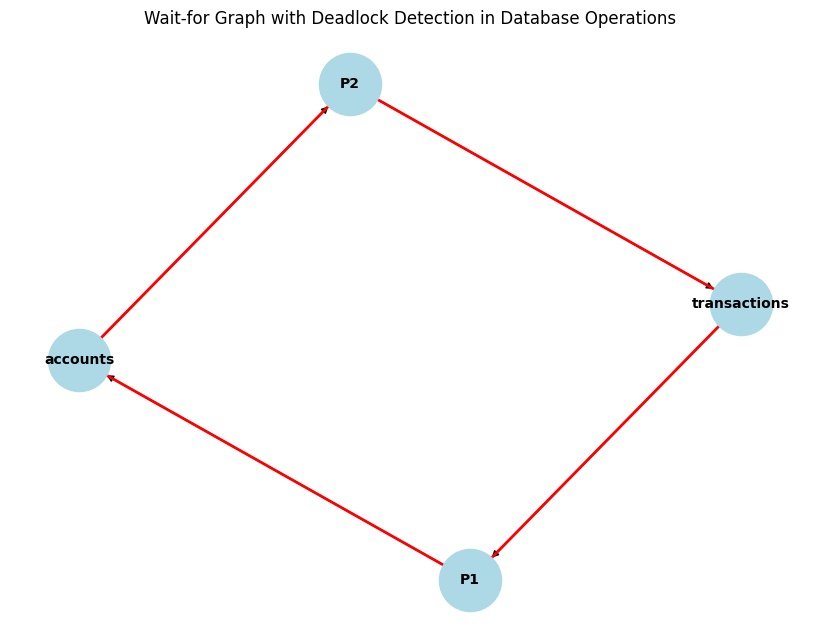

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

# デッドロックのシナリオ
# プロセスP1がアカウントをロックして、トランザクションを待つ
# プロセスP2がトランザクションをロックして、アカウントを待つ
waits_for = [
    ('P1', 'accounts'),     # P1 waits for the accounts table
    ('P2', 'transactions'), # P2 waits for the transactions table
    ('accounts', 'P2'),     # accounts table is locked by P2
    ('transactions', 'P1')  # transactions table is locked by P1
]

# グラフを作成
G = nx.DiGraph()
G.add_edges_from(waits_for)

# デッドロックを検出する（サイクルを探す）
try:
    cycle = nx.find_cycle(G, orientation='original')
    print("Deadlock detected involving the following cycle:")
    print(cycle)
except nx.NetworkXNoCycle:
    cycle = None
    print("No deadlock detected.")

# グラフの描写
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='-|>', arrowsize=20)

# デッドロックがある場合、サイクルを赤色で強調表示
if cycle:
    cycle_edges = [(cycle[i][0], cycle[(i + 1) % len(cycle)][0]) for i in range(len(cycle))]
    nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='r', arrowstyle='-|>', arrowsize=20, width=2)

plt.title("Wait-for Graph with Deadlock Detection in Database Operations")
plt.show()